## Partie 1 : Analyse univarié

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données du site Openfoodfacts

data = pd.read_csv("data_nettoyees.csv", parse_dates=[0])

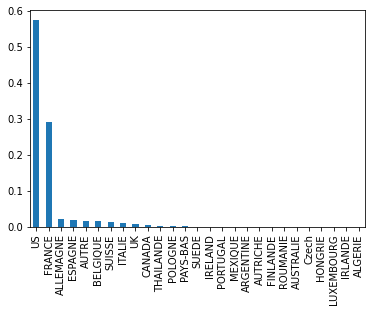

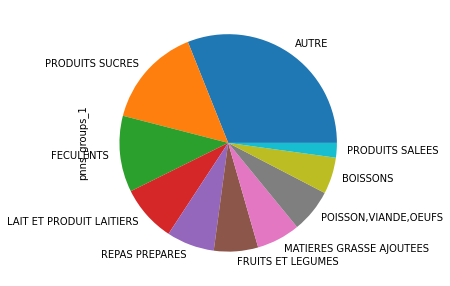

In [2]:
# Dans un premier temps, on regarde les deux variables qualitatives

data['countries'].value_counts(normalize=True).plot(kind='bar')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

data["pnns_groups_1"].value_counts(normalize=True).plot(kind='pie')
plt.show()

nutriscore_score
moy:
 7.851969480568293
med:
 8.0
mod:
 0    0.0
dtype: float64
var:
 81.67051849705146
ect:
 9.03717425399397
skw:
 0.15834012976622142
kur:
 -0.9875161826189429


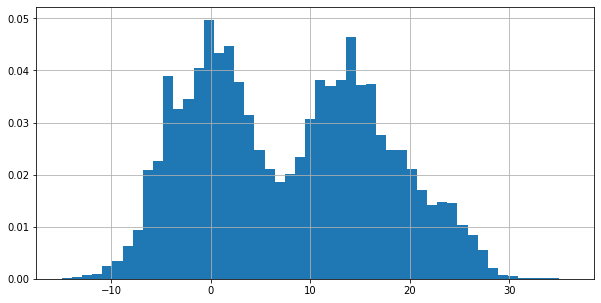

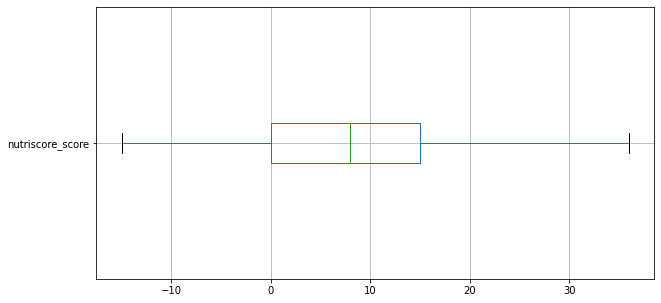

energy-kcal_100g
moy:
 255.46428816387498
med:
 250.0
mod:
 0    357.0
dtype: float64
var:
 28205.364624393744
ect:
 167.94452841457428
skw:
 0.2731644024450991
kur:
 -0.8447735771665017


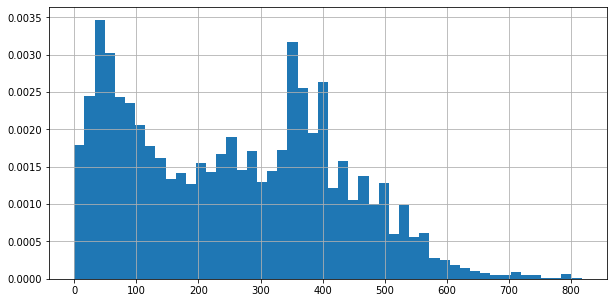

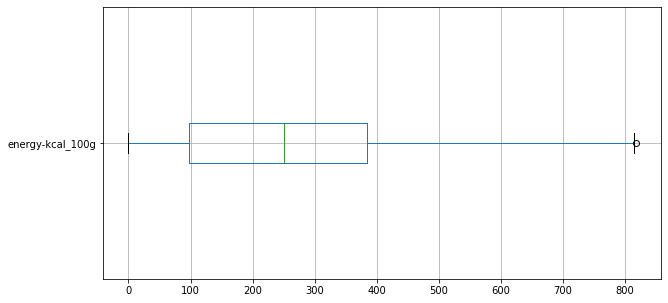

energy_100g
moy:
 1068.1373330267327
med:
 1046.0
mod:
 0    1494.0
dtype: float64
var:
 493121.4507957803
ect:
 702.2260681545368
skw:
 0.2712601440411271
kur:
 -0.8529828034688016


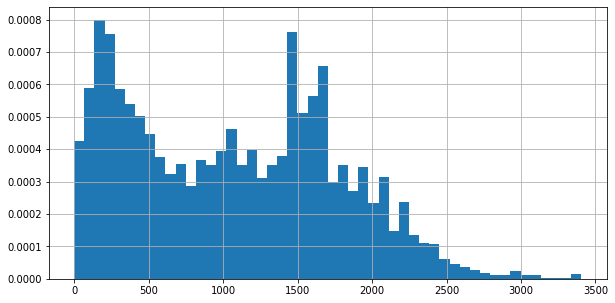

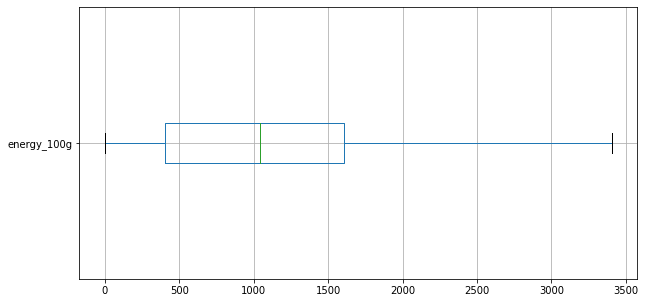

fat_100g
moy:
 10.821441961910283
med:
 5.36
mod:
 0    0.0
dtype: float64
var:
 178.9993903420132
ect:
 13.379065376251557
skw:
 1.8634957489517516
kur:
 4.701261445668194


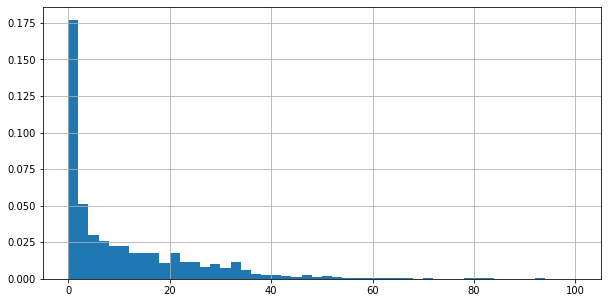

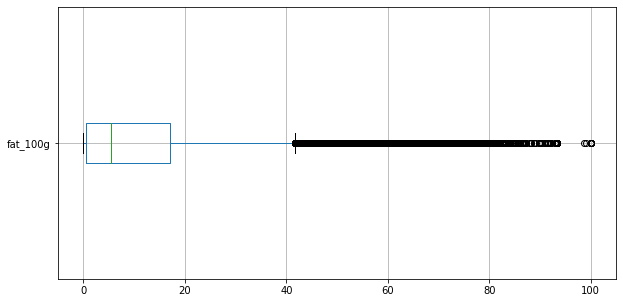

carbohydrates_100g
moy:
 31.527672670175047
med:
 21.43
mod:
 0    0.0
dtype: float64
var:
 760.4249363475599
ect:
 27.57580345787879
skw:
 0.5494895989842148
kur:
 -1.0655154431521061


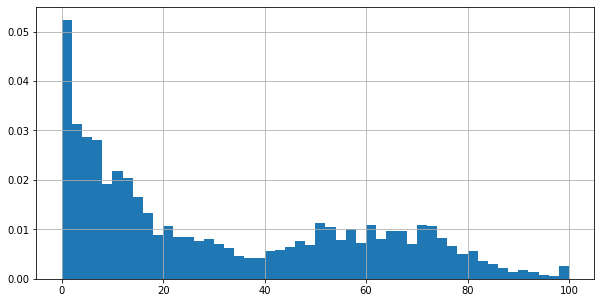

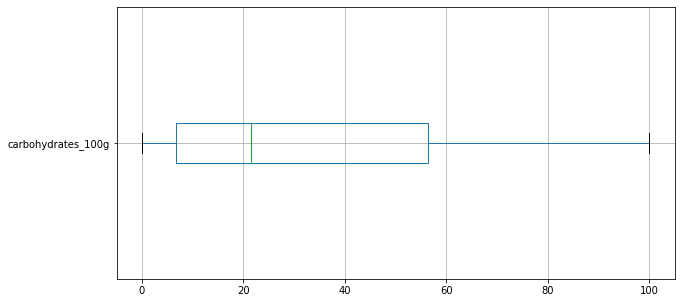

sugars_100g
moy:
 13.834213739050856
med:
 4.7
mod:
 0    0.0
dtype: float64
var:
 354.2539859339722
ect:
 18.821636112037982
skw:
 1.8012625177918373
kur:
 2.916154090407418


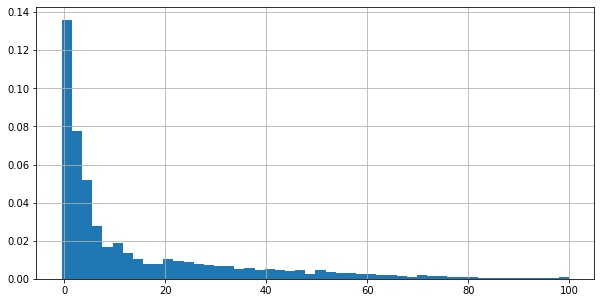

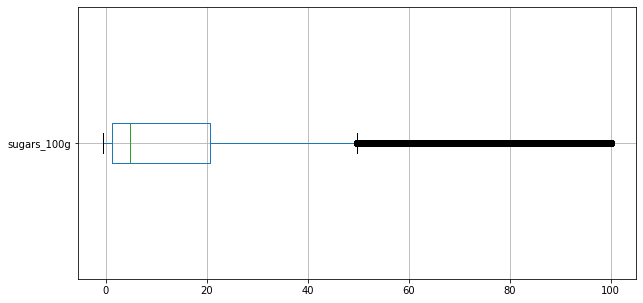

proteins_100g
moy:
 7.5370383561350796
med:
 5.3
mod:
 0    0.0
dtype: float64
var:
 70.65195764486324
ect:
 8.40547188710207
skw:
 2.7109616336034823
kur:
 13.671371919804518


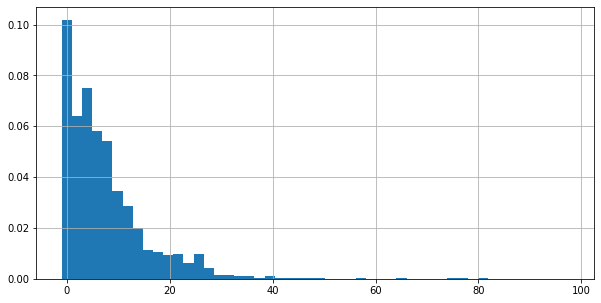

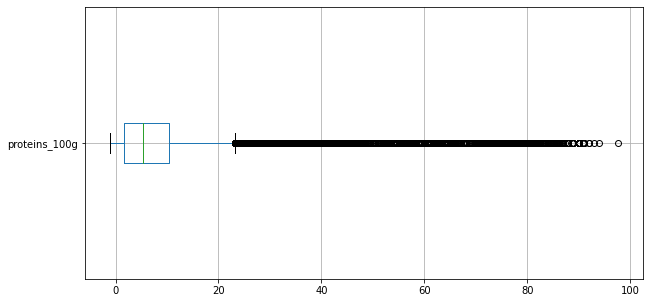

salt_100g
moy:
 1.1709884897362486
med:
 0.6
mod:
 0    0.0
dtype: float64
var:
 16.286353893713258
ect:
 4.035635500601269
skw:
 15.7137444566475
kur:
 305.1822149914907


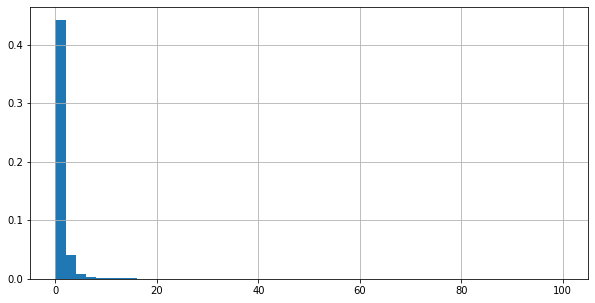

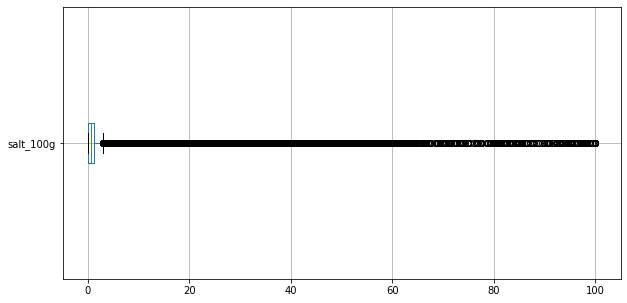

In [3]:
# Analyse univarié pour toutes les variables que nous avons selectionnées du dataset

for c in data.columns:
    if c in ['nutriscore_score', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 
             'sugars_100g', 'proteins_100g', 'salt_100g']:
        subset = data[c] # Création du sous-échantillon
        print(c)
        print("moy:\n",subset.mean())
        print("med:\n",subset.median())
        print("mod:\n",subset.mode())
        print("var:\n",subset.var(ddof=0))
        print("ect:\n",subset.std(ddof=0))
        print("skw:\n",subset.skew())
        print("kur:\n",subset.kurtosis())
        subset.hist(density=True,bins=50) # Crée l'histogramme
        plt.show() # Affiche l'histogramme
        data.boxplot(column=c, vert=False)
        plt.show()

## Partie 2 : Analyse multivariée

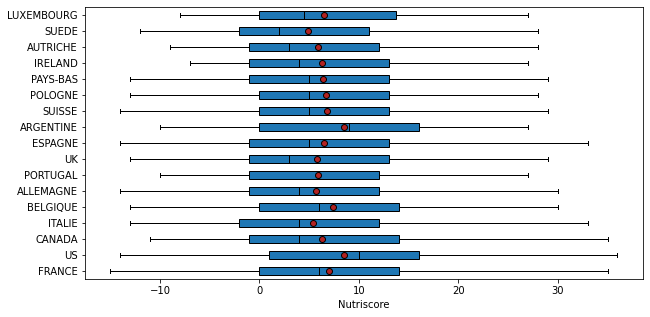

In [4]:
# Dans un premier temps, j'ai voulu regarder s'il était possible de voir des différences entre les pays
# Pour cela, j'ai pensé à regarder les nutriscores vis à vis des pays.
# Mais le résultat est qu'on ne peut pas noter de réelles différentes entre les pays

X = "countries" # qualitative
Y = "nutriscore_score" # quantitative

sous_echantillon_1 = data[data['nutriscore_score'].notna()]


# On n'étudie pas les loyers car trop gros:
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "FINLANDE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "Czech"]
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "ALGERIE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "AUSTRALIE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "HONGRIE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "ROUMANIE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "MEXIQUE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "AUTRE"] 
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "THAILANDE"]
sous_echantillon_1 = sous_echantillon_1[sous_echantillon_1["countries"] != "IRLANDE"]





modalites = sous_echantillon_1[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon_1[sous_echantillon_1[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.xlabel("Nutriscore")

plt.show()

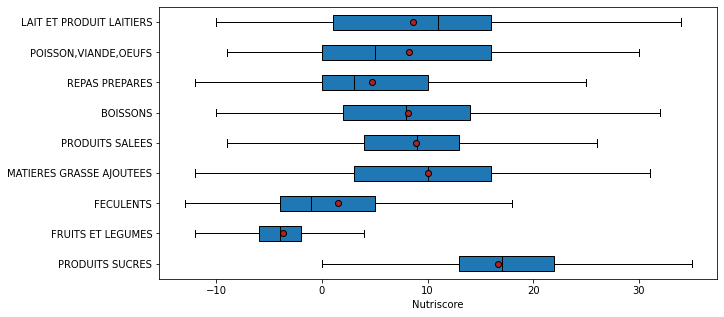

In [5]:
# Après l'étude des pays, j'ai voulu regarder s'il y avait des différences entre les différents groupes que nous avons défini 
# dans le nettoyage de données.
# Cette fois-ci, on remarque des différences notables entre les différents groupes vis à vis du nutriscore

X = "pnns_groups_1" # qualitative
Y = "nutriscore_score" # quantitative

sous_echantillon_2 = data[data['nutriscore_score'].notna()]

sous_echantillon_2 = sous_echantillon_2[sous_echantillon_2["pnns_groups_1"] != "AUTRE"]

modalites = sous_echantillon_2[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon_2[sous_echantillon_2[X]==m][Y])

# Propriétés graphiques   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Nutriscore")

plt.show()

In [6]:
# Fonction pour tracer les analyses multivariées 

import scipy.stats as st

def multivarie(x,y,xlabel,ylabel):
    print(st.pearsonr(x,y)[0])
    print(np.cov(x,y,ddof=0)[1,0])
    plt.plot(x,y,'o',alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

0.4752432451350326
78.46537485359349


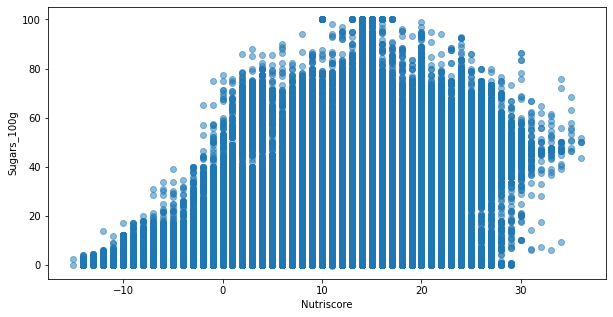

In [7]:
# La prochaine étape est de chercher des corrélations entre les variables quantitatives.
# Dans un premier temps, j'ai regardé la corrélation entre le nutriscore et certains nutriments.
# On voit que les grammes de sucres est bas pour les nutriscore faible


data_nutriscore = data[data['nutriscore_score'].notna()]
data_nutriscore = data_nutriscore[data_nutriscore['sugars_100g'].notna()]

multivarie(data_nutriscore["nutriscore_score"],data_nutriscore["sugars_100g"],'Nutriscore','Sugars_100g')

-0.20468600447044635
-6.380567611390547


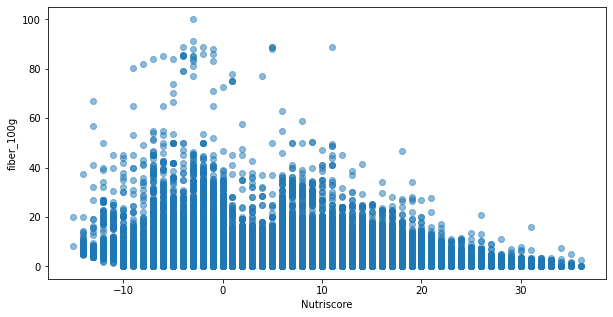

In [8]:
# Dans ce graphique là, c'est l'analyse inverse. Plus le nutriscore est faible, plus les grammes de fibres sont importants
# On peut donc voir qu'il y a des corrélations négatives et positives entre les nutriments et le nutriscore

multivarie(data_nutriscore["nutriscore_score"],data_nutriscore["fiber_100g"],'Nutriscore','fiber_100g')

0.7281381460655273
6840.951429649262


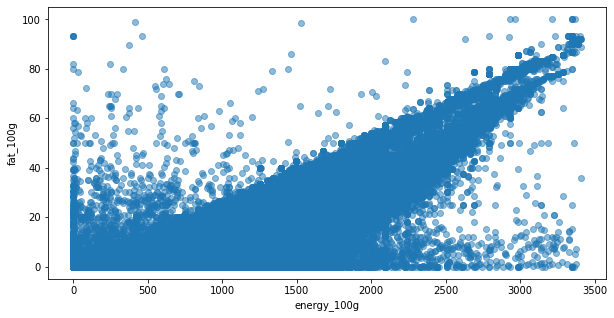

In [9]:
# L'étape suivante était de se rendre compte si cette corrélation se retrouvait au niveau de l'énergie.
# Il semble que c'est bien le cas. 

multivarie(data["energy_100g"],data["fat_100g"],'energy_100g','fat_100g')

0.24394879725114008
641.603782459462


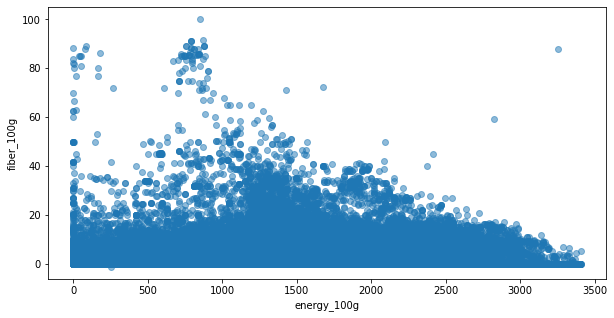

In [10]:
multivarie(data["energy_100g"],data["fiber_100g"],'energy_100g','fiber_100g')

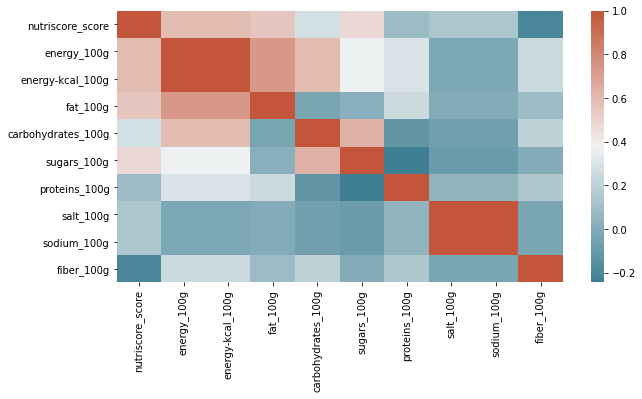

In [11]:
# Ainsi, j'ai décidé de regarder directement toutes les corrélations entre les variables
# On retrouve certains résultats que l'on avait obtenu auparavant.
# Et cela nous permet de voir comment contribue chaque nutriment pour l'energie et le nutriscore.

data_map = data[['nutriscore_score','energy_100g','energy-kcal_100g','fat_100g','carbohydrates_100g', 'sugars_100g',
                 'proteins_100g','salt_100g', 'sodium_100g','fiber_100g']]

cmap = sns.diverging_palette(220, 20, as_cmap=True)
ax = sns.heatmap(data_map.corr(method='pearson', min_periods=1), cmap=cmap)

0.5933301200924654
3778.284167783961


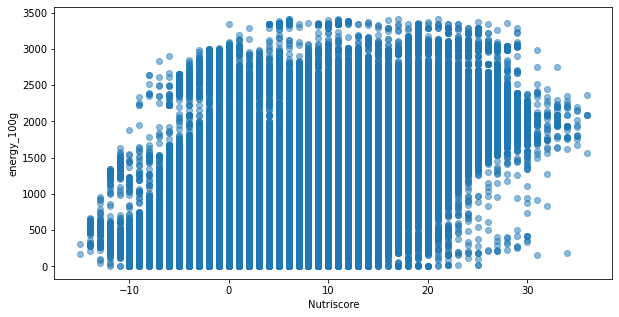

In [12]:
# La suite de notre étude était donc de regarder cette fois si la relation entre l'energie et le nutriscore.
# Mais on peut voir que le grand nombre de nos données ne nous permet pas de voir directement cette corrélation.


multivarie(data_nutriscore["nutriscore_score"],data_nutriscore["energy_100g"],'Nutriscore','energy_100g')

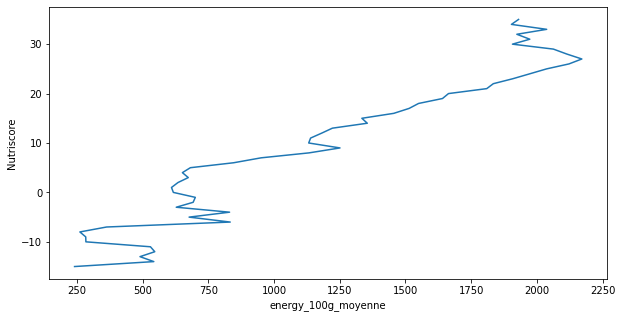

In [13]:
# J'ai donc décidé de calculer la valeur moyenne de l'energie pour chaque nutricore.
# Et on retrouve bien le résultat que l'on avait supposé. Il y a une corrélation qui semble linéaire entre l'energie et le 
# nutriscore

min_nutri = data['nutriscore_score'].min()
max_nutri = data['nutriscore_score'].max()
x = []
y = []

for i in np.arange(min_nutri,max_nutri,1.0):
    data_moyenne_nutri = data[data["nutriscore_score"] == i ]
    subset = data_moyenne_nutri["energy_100g"]
    y.append(subset.mean())
    x.append(i)

plt.plot(y, x)
plt.ylabel("Nutriscore")
plt.xlabel("energy_100g_moyenne")
plt.show()
    

## Partie 3 : Réduction des données

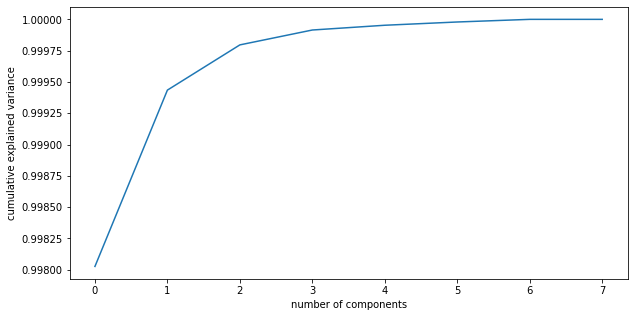

In [14]:
# Ensuite je me suis posé la question de la réduction du nombre de variables. 
# Grâce aux résultats que nous avons trouvé est-ce qu'il ne serait pas pertinent de réduire le nombre de nos variables. 
# J'ai décidé d'appliquer cela seulement aux nutriments et à l'énergie.

# Nous pouvons remarqué que 99,8% de la variance peut être contenu dans une variable.

# Ceci va nous permettre de déterminer le nombre de composantes optimal pour notre ACP

from sklearn.decomposition import PCA

data_pca_2 = data[['energy_100g','fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
                   'sodium_100g','fiber_100g']]

pca = PCA().fit(data_pca_2.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

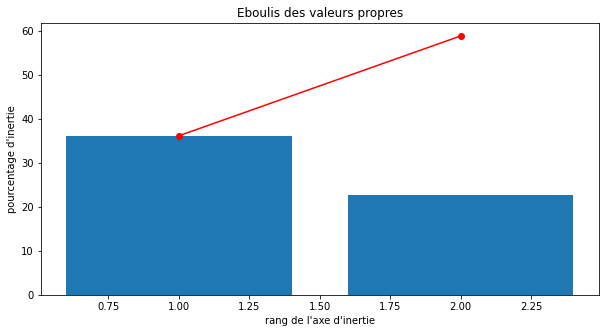

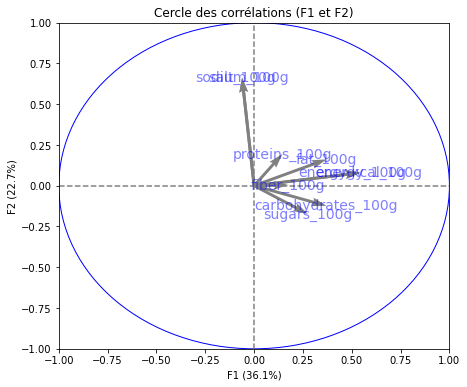

In [15]:
# Grâce aux graphiques précedents, on peut voir que l'on peut réduire nos nutriments à 1 ou 2 variables.

# Dans un premier temps regardons à deux variables 

# On réalise notre ACP et on représente sur les plans factoriels 
# On enregistre les deux composantes dans notre dataset ce qui nous permet de réduire notre étude à seulement deux variables 

from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP

data_pca = data[['energy_100g','energy-kcal_100g','fat_100g', 'carbohydrates_100g','sugars_100g',
                'sodium_100g','proteins_100g', 'salt_100g','fiber_100g']]


# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

f1 = pca.components_[0]
f2 = pca.components_[1]

plt.show()

In [16]:
# Je crée les deux nouvelles variables

data["f1"] = f1[0]*data["energy_100g"] + f1[1]*data["energy-kcal_100g"] + f1[2]*data["fat_100g"] + f1[3]*data["carbohydrates_100g"]+ f1[4]*data["sugars_100g"]+ f1[5]*data["sodium_100g"] + f1[6]*data["proteins_100g"] + f1[7]*data["salt_100g"] + f1[8]*data["fiber_100g"]
data["f2"] = f2[0]*data["energy_100g"] + f2[1]*data["energy-kcal_100g"] + f2[2]*data["fat_100g"] + f2[3]*data["carbohydrates_100g"]+ f2[4]*data["sugars_100g"]+ f2[5]*data["sodium_100g"] + f2[6]*data["proteins_100g"] + f2[7]*data["salt_100g"] + f2[8]*data["fiber_100g"]

C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


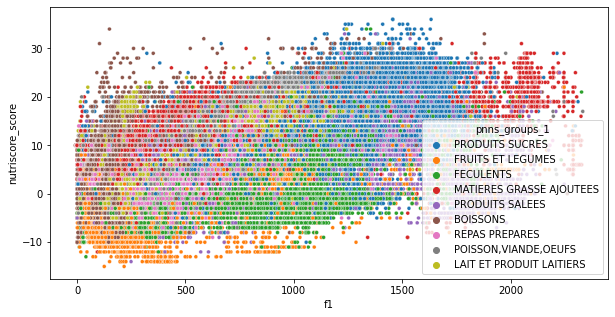

In [17]:
# Je choisi de tracer le nutriscore en fonction d'une des deux variables.
# On peut déjà remarqué que les nutriscores sont regroupé par zone de produits

data_carte = data[data["pnns_groups_1"] != "AUTRE"] 

sns.scatterplot('f1','nutriscore_score', data=data_carte, hue='pnns_groups_1',s = 15)

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


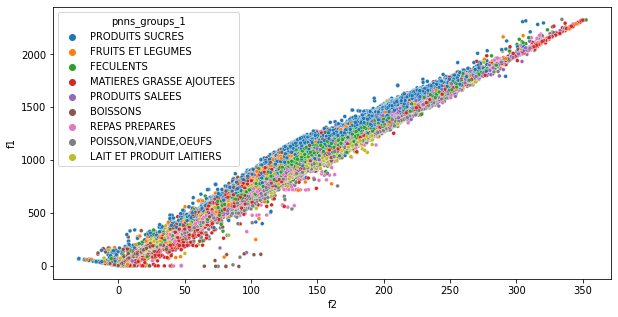

In [18]:
sns.scatterplot('f2', 'f1', data=data_carte, hue='pnns_groups_1',s = 15)

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

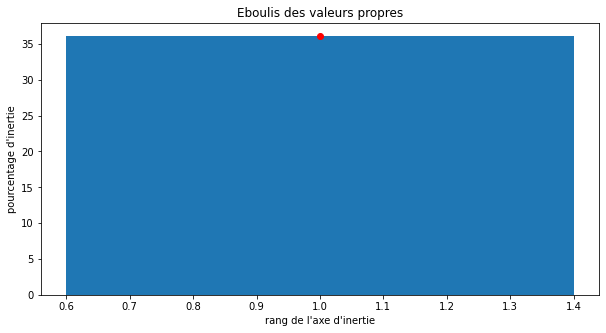

In [19]:
# Cette fois-ci passont à une seule variable.

# choix du nombre de composantes à calculer
n_comp = 1

# selection des colonnes à prendre en compte dans l'ACP

data_pca = data[['energy_100g','energy-kcal_100g','fat_100g', 'carbohydrates_100g','sugars_100g',
                'sodium_100g','proteins_100g', 'salt_100g','fiber_100g']]


# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)


plt.show()


f1_bis = pca.components_[0]

In [20]:
data["f1_bis"] = f1_bis[0]*data["energy_100g"] + f1_bis[1]*data["energy-kcal_100g"] + f1_bis[2]*data["fat_100g"] + f1_bis[3]*data["carbohydrates_100g"]+ f1_bis[4]*data["sugars_100g"]+ f1_bis[5]*data["sodium_100g"] + f1_bis[6]*data["proteins_100g"] + f1_bis[7]*data["salt_100g"] + f1_bis[8]*data["fiber_100g"]

C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


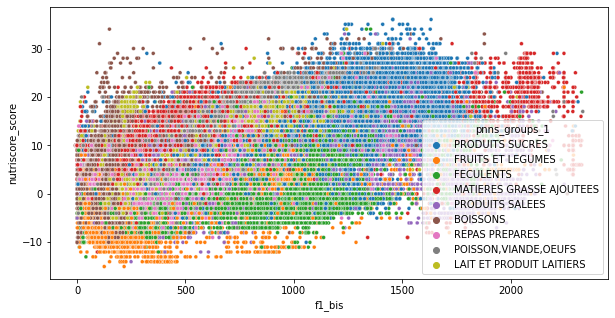

In [21]:
# On retrouve logiquement cette séparation en zone de nutriscore en fonction des pnns_group

data_carte = data[data["pnns_groups_1"] != "AUTRE"] 

sns.scatterplot('f1_bis','nutriscore_score', data=data_carte, hue='pnns_groups_1',s = 15)

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

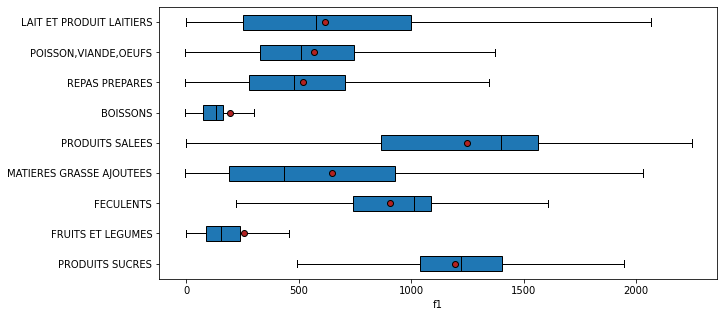

In [22]:
# On voit que f1 nous permet déjà d'un peu mieux séparer les différentes catégories que le nutriscore.

X = "pnns_groups_1" # qualitative
Y = "f1_bis" # quantitative

sous_echantillon_3 = data[data['nutriscore_score'].notna()]

sous_echantillon_3 = sous_echantillon_3[sous_echantillon_3["pnns_groups_1"] != "AUTRE"]

modalites = sous_echantillon_3[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon_3[sous_echantillon_3[X]==m][Y])

# Propriétés graphiques   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("f1")

plt.show()

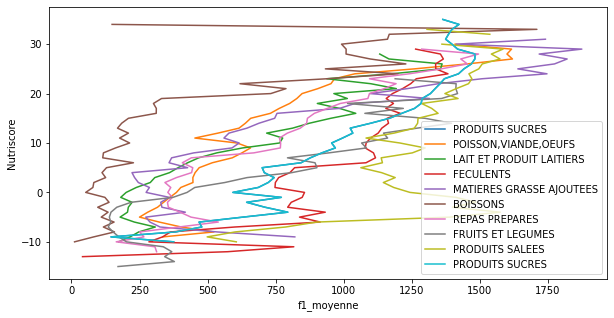

In [23]:
# J'ai voulu regarder l'évolution du nutriscore en fonction de la variable f1 en fonction des catégories de produits

# Ce que l'on peut remarqué est que la dépendance du nutriscore vis à vis de f1 semble linéaire pour certaines catégories
# et non linéaire selon d'autres 

min_nutri = data['nutriscore_score'].min()
max_nutri = data['nutriscore_score'].max()
x = []
y = []

for i in np.arange(min_nutri,max_nutri,1.0):
    y.append(i)

for c in ['PRODUITS SUCRES','POISSON,VIANDE,OEUFS','LAIT ET PRODUIT LAITIERS','FECULENTS','MATIERES GRASSE AJOUTEES',
          'BOISSONS','REPAS PREPARES','FRUITS ET LEGUMES','PRODUITS SALEES','PRODUITS SUCRES']:
    for i in np.arange(min_nutri,max_nutri,1.0):
        data_moyenne_nutri = data[data["nutriscore_score"] == i ]
        data_moyenne_nutri = data_moyenne_nutri[data_moyenne_nutri["pnns_groups_1"] == c]
        subset = data_moyenne_nutri["f1_bis"]
        x.append(subset.mean())
    plt.plot(x, y,label=c)
    plt.legend()
    plt.ylabel("Nutriscore")
    plt.xlabel("f1_moyenne")
    plt.rcParams['figure.figsize'] = [15, 10]
    x = []
    

In [24]:
# Je cherche à exploiter la variable quantitative pnns_groups_2. Celle-ci permettrait une analyse plus fine et plus
# précise du Nutriscore car chaque catégorie pnns_groups_1 est séparée en plusieurs catégories.
# Pour les exploiter, j'ai cherché à trouver le maximum et le minimum et d'en tirer la catégorie correspondantes.

data_group = data[["pnns_groups_1","pnns_groups_2","nutriscore_score"]].groupby(["pnns_groups_1","pnns_groups_2"]).max()
data_group.reset_index(inplace=True)
data_table = data_group.groupby(["pnns_groups_1"]).apply(lambda v:pd.DataFrame(v.loc[v["nutriscore_score"].idxmax()]).T)
data_table.reset_index(drop = True, inplace = True )

data_group_bis = data[["pnns_groups_1","pnns_groups_2","nutriscore_score"]].groupby(["pnns_groups_1","pnns_groups_2"]).min()
data_group_bis.reset_index(inplace = True)
data_table_bis = data_group_bis.groupby(["pnns_groups_1"]).apply(lambda v:pd.DataFrame(v.loc[v["nutriscore_score"].idxmin()]).T)
data_table_bis.reset_index(drop = True, inplace = True )

In [25]:
data_table

,pnns_groups_1,pnns_groups_2,nutriscore_score
0,AUTRE,unknown,36.0
1,BOISSONS,Sweetened beverages,34.0
2,FECULENTS,Bread,34.0
3,FRUITS ET LEGUMES,Soups,23.0
4,LAIT ET PRODUIT LAITIERS,Milk and yogurt,34.0
5,MATIERES GRASSE AJOUTEES,Dressings and sauces,31.0
6,"POISSON,VIANDE,OEUFS",Fish and seafood,30.0
7,PRODUITS SALEES,Appetizers,33.0
8,PRODUITS SUCRES,Sweets,36.0
9,REPAS PREPARES,One-dish meals,29.0


In [26]:
data_table_bis

,pnns_groups_1,pnns_groups_2,nutriscore_score
0,AUTRE,unknown,-13.0
1,BOISSONS,Fruit juices,-10.0
2,FECULENTS,Potatoes,-13.0
3,FRUITS ET LEGUMES,Vegetables,-15.0
4,LAIT ET PRODUIT LAITIERS,Milk and yogurt,-10.0
5,MATIERES GRASSE AJOUTEES,Dressings and sauces,-12.0
6,"POISSON,VIANDE,OEUFS",Fish and seafood,-9.0
7,PRODUITS SALEES,Appetizers,-14.0
8,PRODUITS SUCRES,Biscuits and cakes,-10.0
9,REPAS PREPARES,One-dish meals,-12.0


## Partie 4 : Régression

In [27]:
# Enfin, j'ai cherché à tester une régression linéaire sur les données. Pour cela j'ai séparé les différentes catégories
# pnns_groups_1 grâce à OneHotEncoder. Et j'ai décidé de tracer une des régressions en fonction d'une des catégories.

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

enc = OneHotEncoder(handle_unknown='ignore')
data_nutriscore = data[data['nutriscore_score'].notna()]
X = data_nutriscore["pnns_groups_1"].values
X.shape = (X.shape[0],1)
enc.fit(X)
enc.transform(X)
enc.categories_
X_bis = enc.transform(X).todense()
f1_vec = data_nutriscore["f1_bis"].values
f1_vec.shape = (f1_vec.shape[0],1)
X_2 = np.concatenate((f1_vec,X_bis),axis = 1)

regressor = LinearRegression() 
regressor.fit(X_2,data_nutriscore["nutriscore_score"])
predict = regressor.predict(X_2)

In [28]:
enc.categories_

[array(['AUTRE', 'BOISSONS', 'FECULENTS', 'FRUITS ET LEGUMES',
        'LAIT ET PRODUIT LAITIERS', 'MATIERES GRASSE AJOUTEES',
        'POISSON,VIANDE,OEUFS', 'PRODUITS SALEES', 'PRODUITS SUCRES',
        'REPAS PREPARES'], dtype=object)]

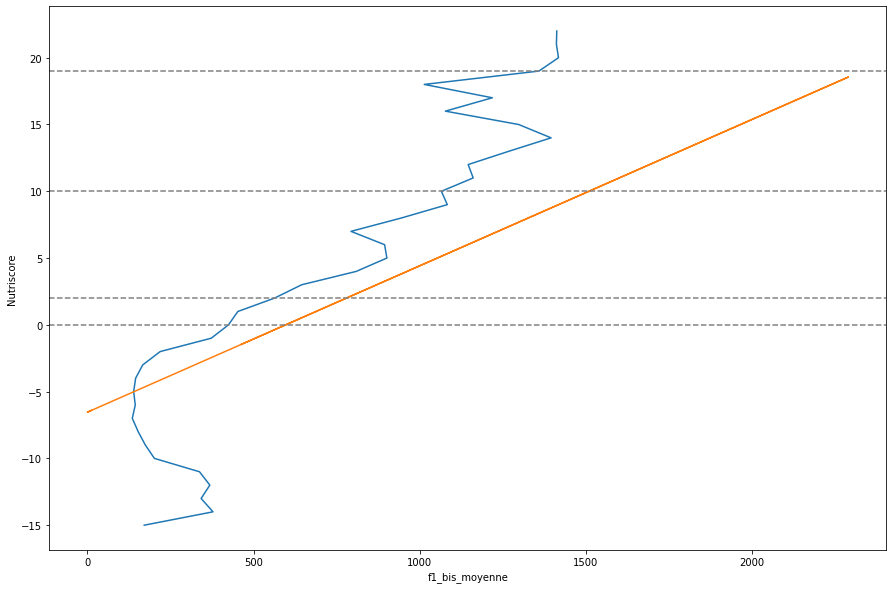

In [29]:
# Je trace la courbe de la régression des fruits ou légumes en fonction des données réelles.

# La régression linéaire ne semble pas très bien convenir. Malgré une partie centrale, les faibles et forts nutriscore semblent
# être mal calculés.

x = []
y = []

data_autre = data[data['nutriscore_score'].notna()]
data_autre = data_autre[data_autre["pnns_groups_1"] == "FRUITS ET LEGUMES"]

min_nutri = data_autre['nutriscore_score'].min()
max_nutri = data_autre['nutriscore_score'].max()
x_bis = []
y_bis = []

for i in np.arange(min_nutri,max_nutri,1.0):
    data_moyenne_nutri = data_autre[data_autre["nutriscore_score"] == i ]
    subset = data_moyenne_nutri["f1_bis"]
    x_bis.append(subset.mean())
    y_bis.append(i)

plt.plot(x_bis, y_bis)
plt.ylabel("Nutriscore")
plt.xlabel("f1_bis_moyenne")


for i in range(len(X_2)):
    if X_2[i,4]==1:
        x.append((X_2[i,0]))
        y.append(predict[i])
        
plt.plot(x,y)
plt.axhline(y=0,color='gray',linestyle='--')
plt.axhline(y=2,color='gray',linestyle='--')
plt.axhline(y=10,color='gray',linestyle='--')
plt.axhline(y=19,color='gray',linestyle='--')
plt.show()

C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.5886699185526798

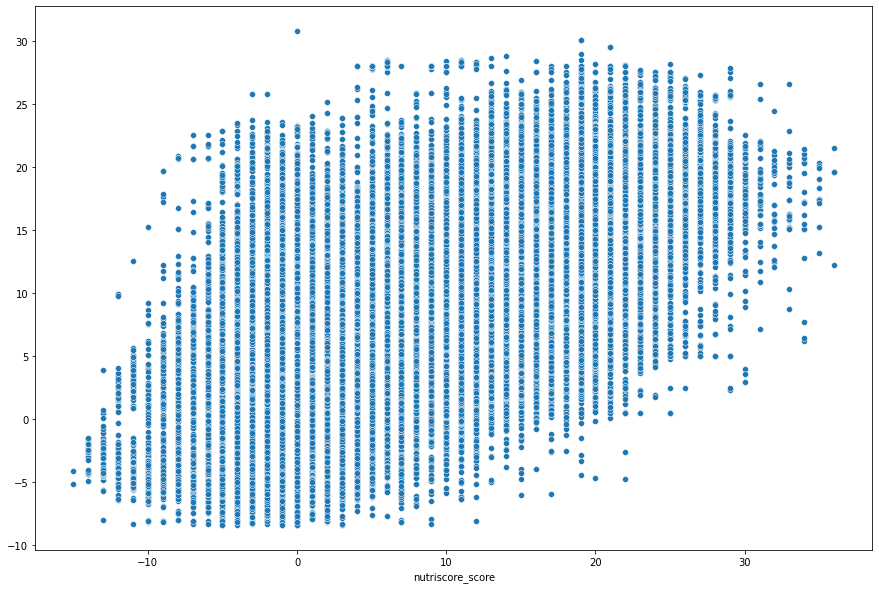

In [33]:
# En conséquence, j'ai voulu représenter la nutriscore réel en fonction du nutriscore estimé.
# Et on peut noter qu'effectivement, la régression linéaire ne semble pas être suffisante pour estimer le nutriscore.
# J'ai calculé le R^2 de la régression. Sachant que c'est sur le jeu de données d'entraînement, il est faible et cela
# confirme que la régression linéaire n'est pas suffisante pour estimer les nutriscores

from sklearn.metrics import r2_score

sns.scatterplot(data_nutriscore["nutriscore_score"],predict)
r2_score(data_nutriscore["nutriscore_score"], predict)